## Задание 1
### Задача 1
*Цель.* Найти корень нелинейного уравнения $f(x^*) = 0$ методом обратной интерполяции на равномерной сетке.

*Теория.* Пусть задана функция $f$ на отрезке $[a, b]$. Известно, что корень нелинейного уравнения $f(x^*) = 0$ принадлежит рассматриваемому отрезку. Зададим равномерную сетку $\{x_i\}_{i = 0}^{n}, \; x_i = a + ih, \; h = \frac{b - a}{n}$. Соответствующая сеточная проекция функции $f(x):$ $\; \{f_i\}_{i = 0}^{n}  = \{f(x_i)\}_{i = 0}^{n}$.

Задача обратного интерполирования, в общем случае, заключается в нахождении $x$ для произвольного $y = f(x)$ по заданной таблице $f_i = f(x_i)$ с помощью построения интерполяции по "обратной" таблице $x_i = x(f_i)$. Для монотонных функций между прямой и обратной интерполяцией особой разницы нет, кроме того, что "обратная" таблица $x(y_i)$ будет иметь переменный шаг, даже если "прямая" таблица имела постоянный.

Важным примером обратной интерполяции является решение уравнения $f(x^*) = 0$. В этом случае строят интерполяционный полином $x = x(y)$ и находят его значение $x(0)$. Обычно для повышения точности в этом способе после далее берут новые узлы, близко расположенные к грубо найденному корню и снова проделывают ту же процедуру.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# # входные данные
f = lambda x: x**(1/5)  # функция (x* = 1.15)
a = 0# левая граница
b = 1 # правая граница
n = 5  # степень интерполяционного многочлена

# f = lambda x: x ** 3 -  27  # (x* = 3) 
# a = 1
# b = 4
# n = 10  # интересный пример

# f = lambda x: x ** 2 - 1  # пример немонотонной функции (x* = 1)
# a = -0.5  # например при а = -0.5, b = 1.5, n = 2 может возникнуть деление на 0  
# b = 1.5
# n = 5

# f = lambda x: np.exp(x) - 3  # (x* = 1.09861228867)
# a = 1  # например при а = -0.5, b = 1.5, n = 2 может возникнуть деление на 0  
# b = 2
# n = 5

In [2]:
# задание сетки, сеточной проекции и точек для построения графика
x_i = np.linspace(a, b, n + 1)
f_i = f(x_i)
x_grid = np.linspace(a, b, 1001)
f_grid = f(x_grid)

Будем строить интерполяционный полином в форме Ньютона. Для этого по индукции введем разделенные разности: 

разделенные разности первого порядка:  $f(x_i, x_j) = \frac{f(x_j) - f(x_i)}{x_j - x_i}$

разделенные разности $k$-го порядка:  $f(x_j, x_{j+1}, \ldots, x_{j + k}) = \frac{f(x_{j + 1}, \ldots, x_{j + k}) - f(x_{j}, \ldots, x_{j + k - 1})}{x_{j + k} - x_j}$.

Тогда интерполяционный полином в форме Ньютона будет иметь вид:
$$ P_n(x) = f(x_0) + (x - x_0)f(x_0, x_1) + (x - x_0)(x - x_1)f(x_0, x_1, x_2) + \ldots + (x - x_0)(x - x_1)\ldots(x - x_{n - 1})f(x_0, x_1, \ldots, x_n) $$
или, по-другому
$$ P_n(x) = f(x_0) + (x - x_0)\left[f(x_0, x_1) + (x - x_1)\left[f(x_0, x_1, x_2) + \ldots + (x - x_{n - 2})\left[f(x_0, x_1, \ldots, x_{n - 1}) + (x - x_{n - 1})f(x_0, x_1, \ldots, x_n)\right]\right]\right] $$

In [3]:
# находим разделенные разности, входящие в итоговое уравнение для полинома Ньютона
def get_coefficients(x_data, f_data):
    coeffs = f_data.copy()
    m = len(x_data)
    for k in range(1, m):
#         coeffs[k:m] = (coeffs[k:m] - coeffs[k-1]) / (x_data[k:m] - x_data[k-1])  # "другие" divided differences
        for i in range(m-1, k-1, -1):
            coeffs[i] = (coeffs[i] - coeffs[i-1]) / (x_data[i] - x_data[i-k])
    return coeffs

# вычисляем значение полинома Ньютона в точке x по заданным сетке и коэффициентам
def newton_interpolation(x_data, coeffs, x):
    degree = len(coeffs) - 1
    value = coeffs[degree]
    for k in range(degree - 1, -1, -1):
        value = coeffs[k] + (x - x_data[k]) * value
    return value

In [4]:
# строим обратную интерполяцию, для этого меняем x<->y местами
coefficients = get_coefficients(f_i, x_i)
x_star = newton_interpolation(f_i, coefficients, 0)
print("x* = ", x_star)

x* =  0.0


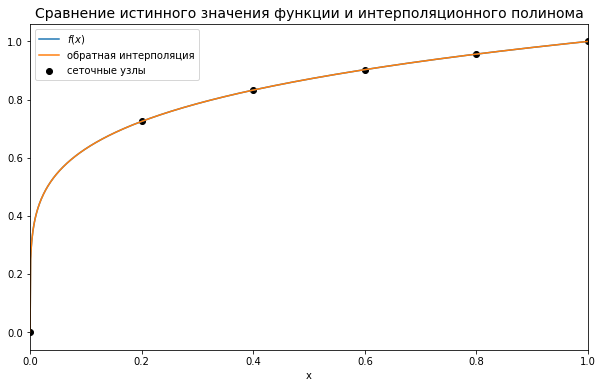

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(x_grid, f(x_grid), label=r"$f(x)$")
plt.plot(newton_interpolation(f_i, coefficients, f_grid), f_grid, label=u"обратная интерполяция")
plt.scatter(x_i, f_i, label=u"сеточные узлы", color="black")
plt.title(u"Сравнение истинного значения функции и интерполяционного полинома", fontsize=14)
plt.xlabel("x")
plt.xlim(a, b)
#plt.ylim(0, 0.02)
plt.legend()
plt.show()